#### Table of Contents
- 1.0 Introduction
  - 1.1 Importing Modules & Dataset
  - 1.2 Column Overview (From Kaggle)
  - 1.3 Data Cleaning
  - 1.4 Added Columns
---
- 2.0 Country EDA
  - 2.1 Creating countrydf (Groupby Country)
  - 2.2 Country Visualizations
  - 2.3 Country-Subset Visualizations
  - 2.4 Country Takeaways & Conculsions
---
- 3.0 Category EDA
  - 3.1 Creating categorydf (Groupby Category)
  - 3.2 Category Visualizations
  - 3.3 Category Takeaways & Conclusions
---
- 4.0 Top 10 Analysis
  - 4.1 Creating Top 10 Subgroups
  - 4.2 Top 10 Subscribers vs. Top 10 Earners
  - 4.3 Top 10 Visualizations
---
- 5.0 Created Columns Analysis
  - 5.1 Earnings per Subscriber Visualization
  - 5.2 View Conversions Visualizations
  - 5.3 Links Analysis

---
- 6.0 Conclusions / Future Work

# 1.0 Introduction

Hello reader, my goal in this study is to analyze the variables that either contribute or correlate with a specific Youtuber around their success in 2023, specifically in their subscribers and earnings. The goal is to understand which variables are most influential on success for a Youtuber, in which at the same time we must figure out how to measure success.

The main variables I'll be analyzing are Category, Enrollment %, Country, Population, Uploads, and Video Views. I chose these because they can have varying degrees of impact depending on the type of viewer and for their purpose.

Although these there are many factors that can contribute to a Youtubers success that we may not understand yet, we will figure out how to measure success and look to predict future success with the information available.

HERE IS MY GITHUB FOR CODE: https://github.com/briangdrewes/youtuber-analysis

### Data

I used a dataset from Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

### 1.1 Importing Modules & Dataset

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_columns = None
import geopandas as gpd
import geoplot as gp
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches

In [6]:
rawdf = pd.read_csv('Global_YouTube_Statistics.csv',encoding ='latin-1')
rawdf.head(6)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.000000e+00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Column Overview (From Kaggle)

**rank**: _Position of the YouTube channel based on the number of subscribers_ \
**Youtuber**: _Name of the YouTube channel_ \
**subscribers**: _Number of subscribers to the channel_ \
**video views**: _Total views across all videos on the channel_ \
**category**: _Category or niche of the channel_ \
**Title**: _Title of the YouTube channel_ \
**uploads**: _Total number of videos uploaded on the channel_ \
**Country**: _Country where the YouTube channel originates_ \
**Abbreviation**: _Abbreviation of the country_ \
**channel_type**: _Type of the YouTube channel (e.g., individual, brand)_ \
**video_views_rank**: _Ranking of the channel based on total video views_ \
**country_rank**: _Ranking of the channel based on the number of subscribers within its country_ \
**channel_type_rank**: _Ranking of the channel based on its type (individual or brand)_ \
**video_views_for_the_last_30_days**: _Total video views in the last 30 days_ \
**lowest_monthly_earnings**: _Lowest estimated monthly earnings from the channel_ \
**highest_monthly_earnings**: _Highest estimated monthly earnings from the channel_ \
**lowest_yearly_earnings**: _Lowest estimated yearly earnings from the channel_ \
**highest_yearly_earnings**: _Highest estimated yearly earnings from the channel_ \
**subscribers_for_last_30_days**: _Number of new subscribers gained in the last 30 days_ \
**created_year**: _Year when the YouTube channel was created_ \
**created_month**: _Month when the YouTube channel was created_ \
**created_date**: _Exact date of the YouTube channel's creation_ \
**Gross tertiary education enrollment (%)**: _Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country_ \
**Population**: _Total population of the country_ \
**Unemployment rate**: _Unemployment rate in the country_ \
**Urban_population**: _Percentage of the population living in urban areas_ \
**Latitude**: _Latitude coordinate of the country's location_ \
**Longitude**: _Longitude coordinate of the country's location_ 

### 1.3 Data Cleaning

From playing around in the dataset, I saw that there were certain Youtuber's that were errors, you can see here as 'Music' at rank 6 is not a Youtuber, but possibly just a bug in reading a category of music.

To single these out, I searched for video views less than 1, and it is pretty clear that these are errors since they have large amounts of subscribers with no earnings estimates or video views, with many NaN values

In [12]:
rawdf[rawdf['video views'] < 1]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.05,0.04,0.58,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
5,6,Music,119000000,0.0,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.0,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Sports,75000000,0.0,NaN,sports,3,United States,US,Entertainment,3898122.0,6266.0,5395.0,16.0,0.0,0.06,0.05,0.77,NaN,2006.0,Jan,30.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
102,103,News,36300000,0.0,NaN,News,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
173,174,Popular on YouTube,29300000,0.0,NaN,Popular on Youtube,3,NaN,NaN,Education,4019724.0,NaN,4847.0,1.0,0.0,0.00,0.00,0.05,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Minecraft - Topic,20900000,0.0,NaN,Minecraft - Topic,0,NaN,NaN,Games,4057944.0,NaN,24.0,NaN,0.0,0.00,0.00,0.00,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN
592,593,Live,16100000,0.0,NaN,Live,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = rawdf.drop(rawdf[rawdf['video views'] < 1].index)

After further exploration, we can see that channel_type and category are different.

In [18]:
df.category.unique()

array(['Music', 'Entertainment', 'Education', 'Shows', 'People & Blogs',
       'Gaming', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       nan, 'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [19]:
df.channel_type.unique()

array(['Music', 'Entertainment', 'Education', 'People', 'Sports', 'Film',
       'News', nan, 'Games', 'Comedy', 'Howto', 'Nonprofit', 'Autos',
       'Tech', 'Animals'], dtype=object)

In order to remove the NaN values, and get accurate depiction of the category/channel type, I researched what the category types are for YouTube, and it was convenient that category was close to fully accurate, with only a few NaN values which I was able to take over from channel_type where missing. Alongside that, I had to do a few individual corrections. I also spot checked randomly to see if channels were lining up.

In [20]:
#created a function to take in an incorrect string from channel_type and replace with the correct style for category, for those NaN values.

def cat_cleaner(string):
    if string == 'Animals': 
        return 'Pets & Animals'
    elif string == 'Autos': 
        return 'Autos & Vehicles'
    elif string == 'Film': 
        return 'Film & Animation'
    elif string == 'Games': 
        return 'Gaming'
    elif string == 'Howto': 
        return 'Howto & Style'
    elif string == 'News': 
        return 'News & Politics'
    elif string == 'Nonprofit': 
        return 'Nonprofits & Activism'
    elif string == 'People': 
        return 'People & Blogs'
    elif string == 'Tech': 
        return 'Science & Technology'
    else:
        return string 

In [21]:
for index, row in df.iterrows():
    if df.category.isnull()[index]:
        df.category[index] = cat_cleaner(df.channel_type[index])

In [22]:
#adjusting a few specific cases I saw in the top few records
df[df.Youtuber == 'Busy Fun Ltd']['category'].index
df.at[445, 'category'] = 'Comedy'
df[df.Youtuber == 'KL BRO Biju Rithvik'].Country.index
df.at[302, 'Country'] = 'India'
df[df.Youtuber == 'BeatboxJCOP'].Country.index
df.at[483, 'Country'] = 'South Korea'

### 1.4 Added Columns

I will add a couple columns to the dataframe that I thought would be interesting to analyze later in the project.

**youtuber_count**: _Each youtuber is assigned a 1, this is used for aggregate groupby objects to record the amount of youtubers_ \
**earnings_per_sub**: _Highest Yearly Earnings divided by subscribers, a metric to how much a youtuber is estimated to make with the addition of 1 subscriber_ \
**links**: _The amount of links in the youtuber about page, I manually went on the pages of the top 10 youtubers to do a small analysis_ \
**overall_view_conversion**: _Subscribers divided by the amount of video views, looking to show how many video views it takes to convert 1 subscriber_ \
**last_30day_view_conversion**: _View conversion for the last 30 days_


In [26]:
# adding Youtuber Count to analyze how many Youtubers in certain categories or countries
df['x'] = 1
df = df.rename({'x':'youtuber_count'},axis=1)

In [28]:
#seeing how much a youtuber is estimated to make per subscriber
df['earnings_per_sub'] = df.loc[:,'highest_yearly_earnings'] /df.loc[:,'subscribers'] 

In [27]:
#adding links to top 10 youtubers to see what impact a youtuber receives when adding n amount of links in their about page
#df['links'] = 0 #adding a new column 'links' and setting to 0, for this project I will manually add the links but future works could be webscraped
df.at[df[df.Youtuber == 'T-Series'].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "MrBeast"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Cocomelon - Nursery Rhymes"].links.index[0],'links'] = 6
df.at[df[df.Youtuber == "SET India"].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "ýýý Kids Diana Show"].links.index[0],'links'] = 8
df.at[df[df.Youtuber == "PewDiePie"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Like Nastya"].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "Vlad and Niki"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Zee Music Company"].links.index[0],'links'] = 4
df.at[df[df.Youtuber == "WWE"].links.index[0],'links'] = 6
df.at[df[df.Youtuber == "Zee TV"].links.index[0],'links'] = 2
df.at[df[df.Youtuber =="StarPlus"].links.index[0],'links'] = 4
df.at[df[df.Youtuber =="Sony SAB"].links.index[0],'links'] = 5
df.at[df[df.Youtuber =="GR6 EXPLODE"].links.index[0],'links'] = 1
df.at[df[df.Youtuber =="ýýýýýýýýý KIMPRO"].links.index[0],'links'] = 1
df.at[df[df.Youtuber =="DaFuq!?Boom!"].links.index[0],'links'] = 3
df.at[df[df.Youtuber =="ViralHog"].links.index[0],'links'] = 7
df.at[df[df.Youtuber =="KL BRO Biju Rithvik"].links.index[0],'links'] = 0
df.at[df[df.Youtuber =="GH'S"].links.index[0],'links'] = 4
df.at[df[df.Youtuber =="Filaretiki"].links.index[0],'links'] = 3
df.at[df[df.Youtuber =="BeatboxJCOP"].links.index[0],'links'] = 3


In [30]:
#adding view conversions to see how many views it takes to convert to subscribers
df['overall_view_conversion'] = df.loc[:,'subscribers'] /df.loc[:,'video views'] 
df['last_30day_view_conversion'] = df.loc[:,'subscribers_for_last_30_days'] /df.loc[:,'video_views_for_the_last_30_days'] 

# 2.0 Country EDA

Country was one of the variables that first caught my attention. I know YouTube is big in the US, but it will be interesting to see what other countries have a significant YouTube presence. It will also be interesting to see how successful creators are depending on their country or if opportunity is available everywhere to be a YouTube creator. YouTube has its own factors that personalize content for viewers, and country is sure to have some part in that. Let's see what the data says.

### 2.1 Creating countrydf (Groupby Country)

In [36]:
countrydf = df.groupby('Country').sum().sort_values('subscribers',ascending=False)
countrydf['sizer'] = 1 #added this to help with sizing in plotly express scatterplots
countrydf.head()

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_54286/3839819257.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,links,youtuber_count,earnings_per_sub,overall_view_conversion,last_30day_view_conversion,sizer
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,
United States,150984,7084500000,3.690292e+12,1299605,68829154.0,153348.0,126564.0,5.362141e+10,11351605.11,1.816076e+08,1.360415e+08,2.179397e+09,68915203.0,623631.0,4623.0,27430.2,1.020825e+11,4571.70,8.417620e+10,11535.064640,-29766.709101,37,311,96.851000,8808.979858,1.789411,1
India,83531,4333400000,2.299037e+12,3730053,17644342.0,37002.0,22688.0,3.974132e+10,9840719.25,1.572862e+08,1.179759e+08,1.889354e+09,59740000.0,340309.0,2711.0,4720.8,2.295582e+11,900.48,7.913330e+10,3459.738912,13265.763840,25,169,69.903893,1.308250,0.397329,1
Brazil,36187,1221800000,4.812090e+11,168178,4293900.0,6961.0,9950.0,1.383949e+10,1811314.00,2.884909e+07,2.177564e+07,3.478070e+08,7200000.0,122765.0,1010.0,3180.6,1.317868e+10,748.96,1.136098e+10,-882.570248,-3219.367360,1,62,16.656028,0.327876,0.058896,1
United Kingdom,22111,917400000,4.305665e+11,86816,10830787.0,12581.0,19156.0,3.664467e+09,916087.48,1.464408e+07,1.100671e+07,1.759100e+08,4801130.0,86454.0,712.0,2580.0,2.873879e+09,165.55,2.404058e+09,2381.256193,-147.746839,0,43,9.207987,0.122947,0.144399,1
Mexico,18527,626900000,1.982199e+11,33410,15009450.0,17159.0,23770.0,1.860700e+09,449684.00,7.218781e+06,5.388860e+06,8.625057e+07,3000000.0,66457.0,512.0,1326.6,4.158463e+09,112.86,3.386686e+09,779.938533,-3384.241872,0,33,5.277333,0.153290,0.082467,1


Just a quick look we can see that the US and India have a massive amount of subscribers and highest yearly earnings as compared to the next few.

### 2.2 Country Visualizations

I wanted to see the overall trend of countries in respect to subscribers and highest yearly earnings visibily, as viewing in a dataframe can be difficult.

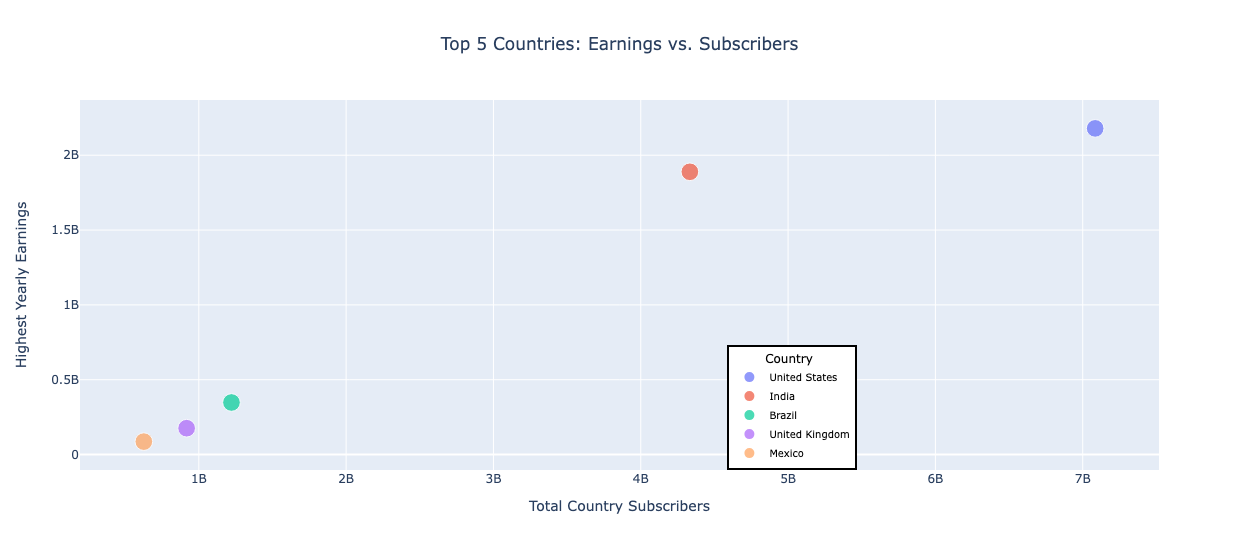

In [109]:
px.scatter(countrydf.head(5), 
           x='subscribers',y='highest_yearly_earnings', size = 'sizer', size_max=12.5,
               
               color=countrydf.head(5).index,
                labels = {'subscribers': 'Total Country Subscribers',
                          'highest_yearly_earnings': 'Highest Yearly Earnings'},
                     title ='Top 5 Countries: Earnings vs. Subscribers' ).update_layout(title_x=0.5,
                                                                                autosize=False, height=550, width=500).update_layout(
        legend_title="        Country", legend=dict(
        x=.6,
        y=0,
        #title_font_family="Sans Serif",
        font=dict(
            #family="Sans Serif",
            size=10,
            color="black"
        ),
        bgcolor="White",
        bordercolor="Black",
        borderwidth=2
    ))

In [40]:
countrydf.youtuber_count.head(5)

Country
United States     311
India             169
Brazil             62
United Kingdom     43
Mexico             33
Name: youtuber_count, dtype: int64

Here we can see that the more subscribers a country has, the more earnings their YouTubers make in total. With this small pull of 5 countries we can see a general trend that the more YouTubers in a country also shows success in subscribers and earnings. I only took the top five to not overcrowd our visual, and to give a good introduction to country. Below we will get into a more worldy approach of the countries.

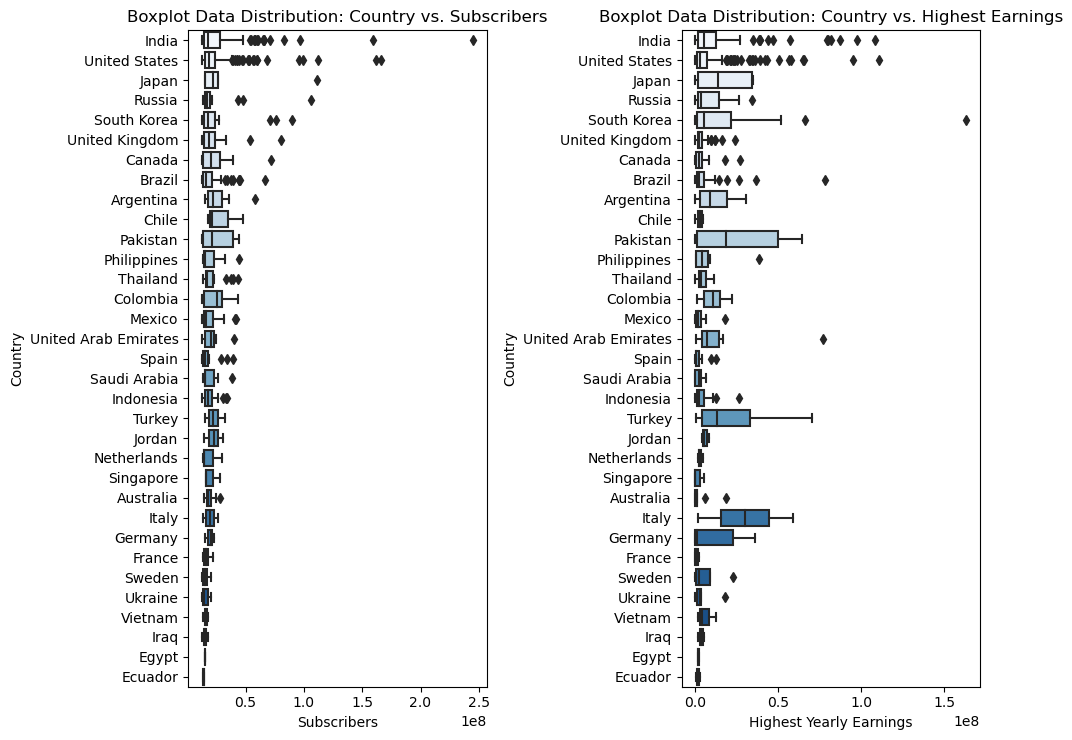

In [43]:
plt.figure(figsize=(10, 7.5))
gr1 = df.Country.value_counts() > 1
gr1 = gr1.where(gr1 == True).dropna()
#filtered out the singular youtubers countries
plt.subplot(1, 2, 1)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='subscribers',palette='Blues') #,showfliers=False)
plt.title('Boxplot Data Distribution: Country vs. Subscribers')
plt.ylabel('Country')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='highest_yearly_earnings',palette='Blues')
plt.title('Boxplot Data Distribution: Country vs. Highest Earnings')
plt.ylabel('Country')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

From seeing the distribution of data through boxplots for each country (removing singular youtuber countries) there was some interesting data. India and US seem to be carried by mostly outliers. There were five countries here that specifically piqued my interest, and those are South Korea, Pakistan, Turkey, Italy, and Germany. The reason of interest was their drastically different distribution of earnings as compared to the distribution on the subscriberside. This led me to question are there more opportunities for certain countries?

In [50]:
subset_countriesdf = df.iloc[:,[2,3,13,17,18,7]] #taking only the columns I am looking to analyze.
subset_countriesdf['Country'] = np.where(df['Country'].isin(['South Korea', 'Italy', 'Germany', 'Turkey','Pakistan']) , 'Subset Countries', 'All Countries') #the subset of the countries mentioned earlier

Text(0.5, 1.0, 'Mean Earnings, All Countries vs. Subset')

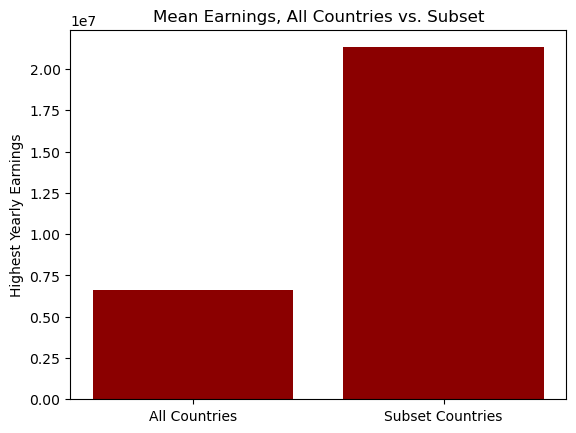

In [51]:
subset_countriesdf_grouped = subset_countriesdf.groupby('Country',as_index=False).mean()
plt.bar(subset_countriesdf_grouped.Country, subset_countriesdf_grouped.highest_yearly_earnings , color = 'darkred' )
plt.ylabel('Highest Yearly Earnings')
plt.title('Mean Earnings, All Countries vs. Subset')

This was an astounding point, the mean of highest earnings among the 5 subset countries were more than double that of the rest of the countries. \
I wanted to explore this further, therefore I created two separate correlation heatmaps to see the differences in the numeric variables among the subset and the full list of countries:

In [55]:
subset_countriesdf = df[df['Country'].isin(['South Korea', 'Italy', 'Germany', 'Turkey','Pakistan'])].select_dtypes(include=['number'])  #I had to retrieve only the data types of number for the correlation
not_subset_countriesdf = df[~df['Country'].isin(['South Korea', 'Italy', 'Germany', 'Turkey','Pakistan'])].select_dtypes(include=['number'])  
subset_countriesdf['subscribers_for_last_30_days'].fillna(subset_countriesdf['subscribers_for_last_30_days'].mean(), inplace=True) #I replaced the missing NaN values with the mean of the columns
not_subset_countriesdf['subscribers_for_last_30_days'].fillna(not_subset_countriesdf['subscribers_for_last_30_days'].mean(), inplace=True)
subset_countriesdf['video_views_for_the_last_30_days'].fillna(subset_countriesdf['video_views_for_the_last_30_days'].mean(), inplace=True)
not_subset_countriesdf['video_views_for_the_last_30_days'].fillna(not_subset_countriesdf['video_views_for_the_last_30_days'].mean(), inplace=True)
subset_countriesdf=subset_countriesdf[['subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]
not_subset_countriesdf=not_subset_countriesdf[['subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]

subset_countriesdf_heatmap = subset_countriesdf.corr()
not_subset_countriesdf_heatmap = not_subset_countriesdf.corr()

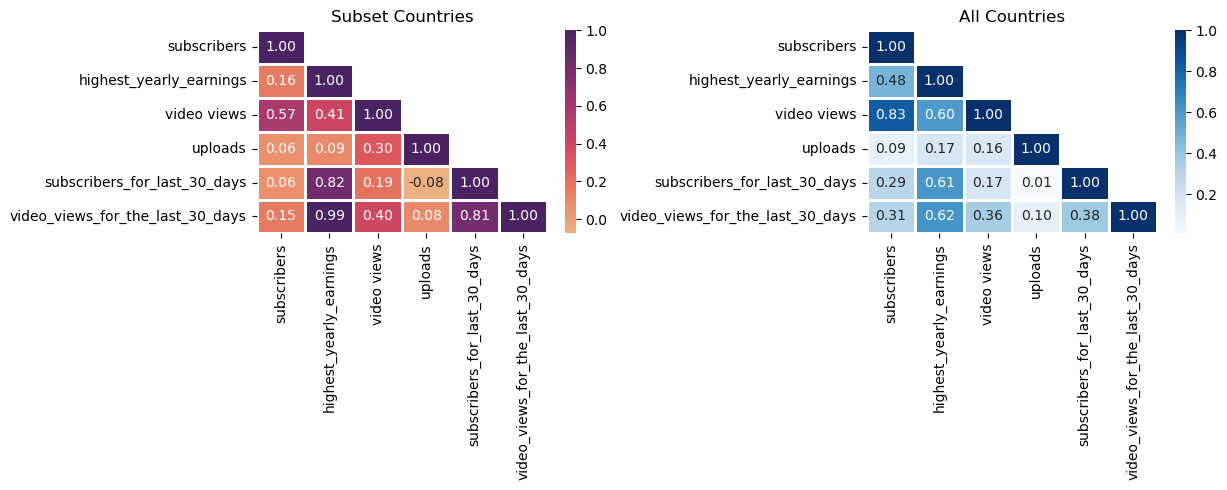

In [72]:

plt.figure(figsize=(12.5, 5))

plt.subplot(1, 2, 1)
matrix7 = np.triu(np.ones_like(subset_countriesdf_heatmap, dtype=bool))
np.fill_diagonal(matrix7,False)
sns.heatmap(subset_countriesdf_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,mask = matrix7)
plt.title('Subset Countries')
plt.subplot(1, 2, 2)
matrix8 = np.triu(np.ones_like(not_subset_countriesdf_heatmap, dtype=bool))
np.fill_diagonal(matrix8,False)
sns.heatmap(not_subset_countriesdf_heatmap, annot=True, cmap='Blues', fmt=".2f",linewidths=1,mask = matrix8)
plt.title('All Countries')


plt.tight_layout()

plt.show()

Extremely interesting takeaway from here, it shows us that some countries earnings are more correlated with last 30 day activity than the rest of the countries. Also, it seems that the countries that are seeing greater increases in earnings due to recent activity are seeing less subscribership overall \
This can lead to many questions.  \
_Does YouTube have algorithmic search that caters better to certain countries in a given month?  \
Could VPNs assist creators by virtually putting themselves into another country or registering as a certain nationality?  \
Are there nationalistic effects so great that it impacts creators for that country?  \
How long does it take for a country to adopt YouTube to the point where creators can be making hundreds of millions of dollars?_  


### 2.4 Country Takeaways and Conclusions

With a little alluding in the last section through questions, I wanted to put together a couple of takeways and conclusions about our exploration through the dataset in the lense of countries.
- You don't need to be the first, second or third most popular YouTuber country to be a successful creator. I used the word popular because there are so many different factors to think about that could define that word. Subscribership, earnings, video views, last 30 day metrics, there is no best way and there is A LOT of money being made in many countries.
- A data-driven approach to creating in a 'trending' country like the ones in our subset could pay off, however best to capitalize in the 30 day periods that earnings are correlated with.
    - VPNs can place virtual location in another country... may be misleading/distrustful
    - YouTube may have certain factors in their recommendations to users depending on IP address or country selected when the channel is created
- Old-fashioned nationalism may play a factor, Italians may be big YouTuber users and have a pride in their own kin, leading to great surge in views, subscribers, and earnings. More research required.